# HW13

### Author: Joseph Wong

## Import Packages

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

## About the Data

### Import the Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

# Note this downloads three files. We will use the second one.
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df['ripe'] = df['ripeness'].apply(lambda x: 1 if 'ripe' in x else 0)
df

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe
0,14.5,19,40,26,black,34,175,261,ripe,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0
2,88.5,60,94,46,dark green,79,220,143,hard,0
3,93.8,105,87,41,dark green,75,299,140,hard,0
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,0


### Data Source

The dataset is owned by Amal Dev and was posted to kaggle.com (*https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset*). The data was last updated in May 2025 and I accessed the data on October 21, 2025. There is an Apache 2.0 license, which means the dataset is permissive and open-source (*https://www.apache.org/licenses/LICENSE-2.0*). It is a synthetic dataset based on data from the USDA Agricultural Handbook No. 66 (Commercial Storage of Fruits, Vegetables, and Florist and Nursery Stocks), Hass Avocado Board Ripening Guidelines (2023 Postharvest Best Practices), and peer-reviewed studies on avocado quality assessment (Journal of Food Science (2021): Acoustic firmness testing, Postharvest Biology and Technology (2022): HSB color progression).

### Variables

In [4]:
df.dtypes

firmness          float64
hue                 int64
saturation          int64
brightness          int64
color_category     object
sound_db            int64
weight_g            int64
size_cm3            int64
ripeness           object
ripe                int64
dtype: object

The datatypes for each column appears to be reasonable.

**Variables:**
- 'firmness': resistance to penetration
    - measurement method: penetrometer
    - unit & range: 10-100 N
- 'hue': color wavelength
    - measurement method: camera & HSB conversion
    - unit & range: 0-360°
- 'saturation': color intensity
    - measurement method: camera & HSB conversion
    - unit & range: 0-100%
- 'brightness': color lightness
    - measurement method: camera & HSB conversion
    - unit & range: 0-100%
- 'color_category': visual skin color
    - measurement method: image analysis
    - unit & range: dark green, green, purple, or black
- 'sound_db': acoustic response
    - measurement method: microphone (tapping test)
    - unit & range: 30-80 dB
- 'weight_g': fruit mass
    - measurement method: digital scale
    - unit & range: 150-300 g
- 'size_cm3': volume measurement
    - measurement method: calipers
    - unit & range: 100-300 cm³

**'ripeness' contains the data we want to predict.** Ripeness is the maturation stage, which is either hard, pre-conditioned, breaking, firm-ripe, or ripe.

## Basic Analysis

### Basics

In [19]:
df.shape

(250, 10)

There are 250 observations and 9 variables.

In [20]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,ripe
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000,0.400000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564,0.490881
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000,0.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000,0.000000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000,0.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000,1.000000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000,1.000000


In [21]:
df['color_category'].value_counts()

color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64

In [22]:
df['ripeness'].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

In [32]:
df['ripe'].value_counts()

ripe
0    150
1    100
Name: count, dtype: int64

There does not appear to be any NaNs in any column.

By looking at the statistics/distributions of each variable, it appears that there are no outliers in the dataset.

There are 50 observations of each 'ripeness' category and each 'color_category' category has either 50 or 75 observations. Also, there are 150 unripe and 100 ripe observations, as seen in the 'ripe' column. This means the data is well-balanced.

### Pairplot for Firmness

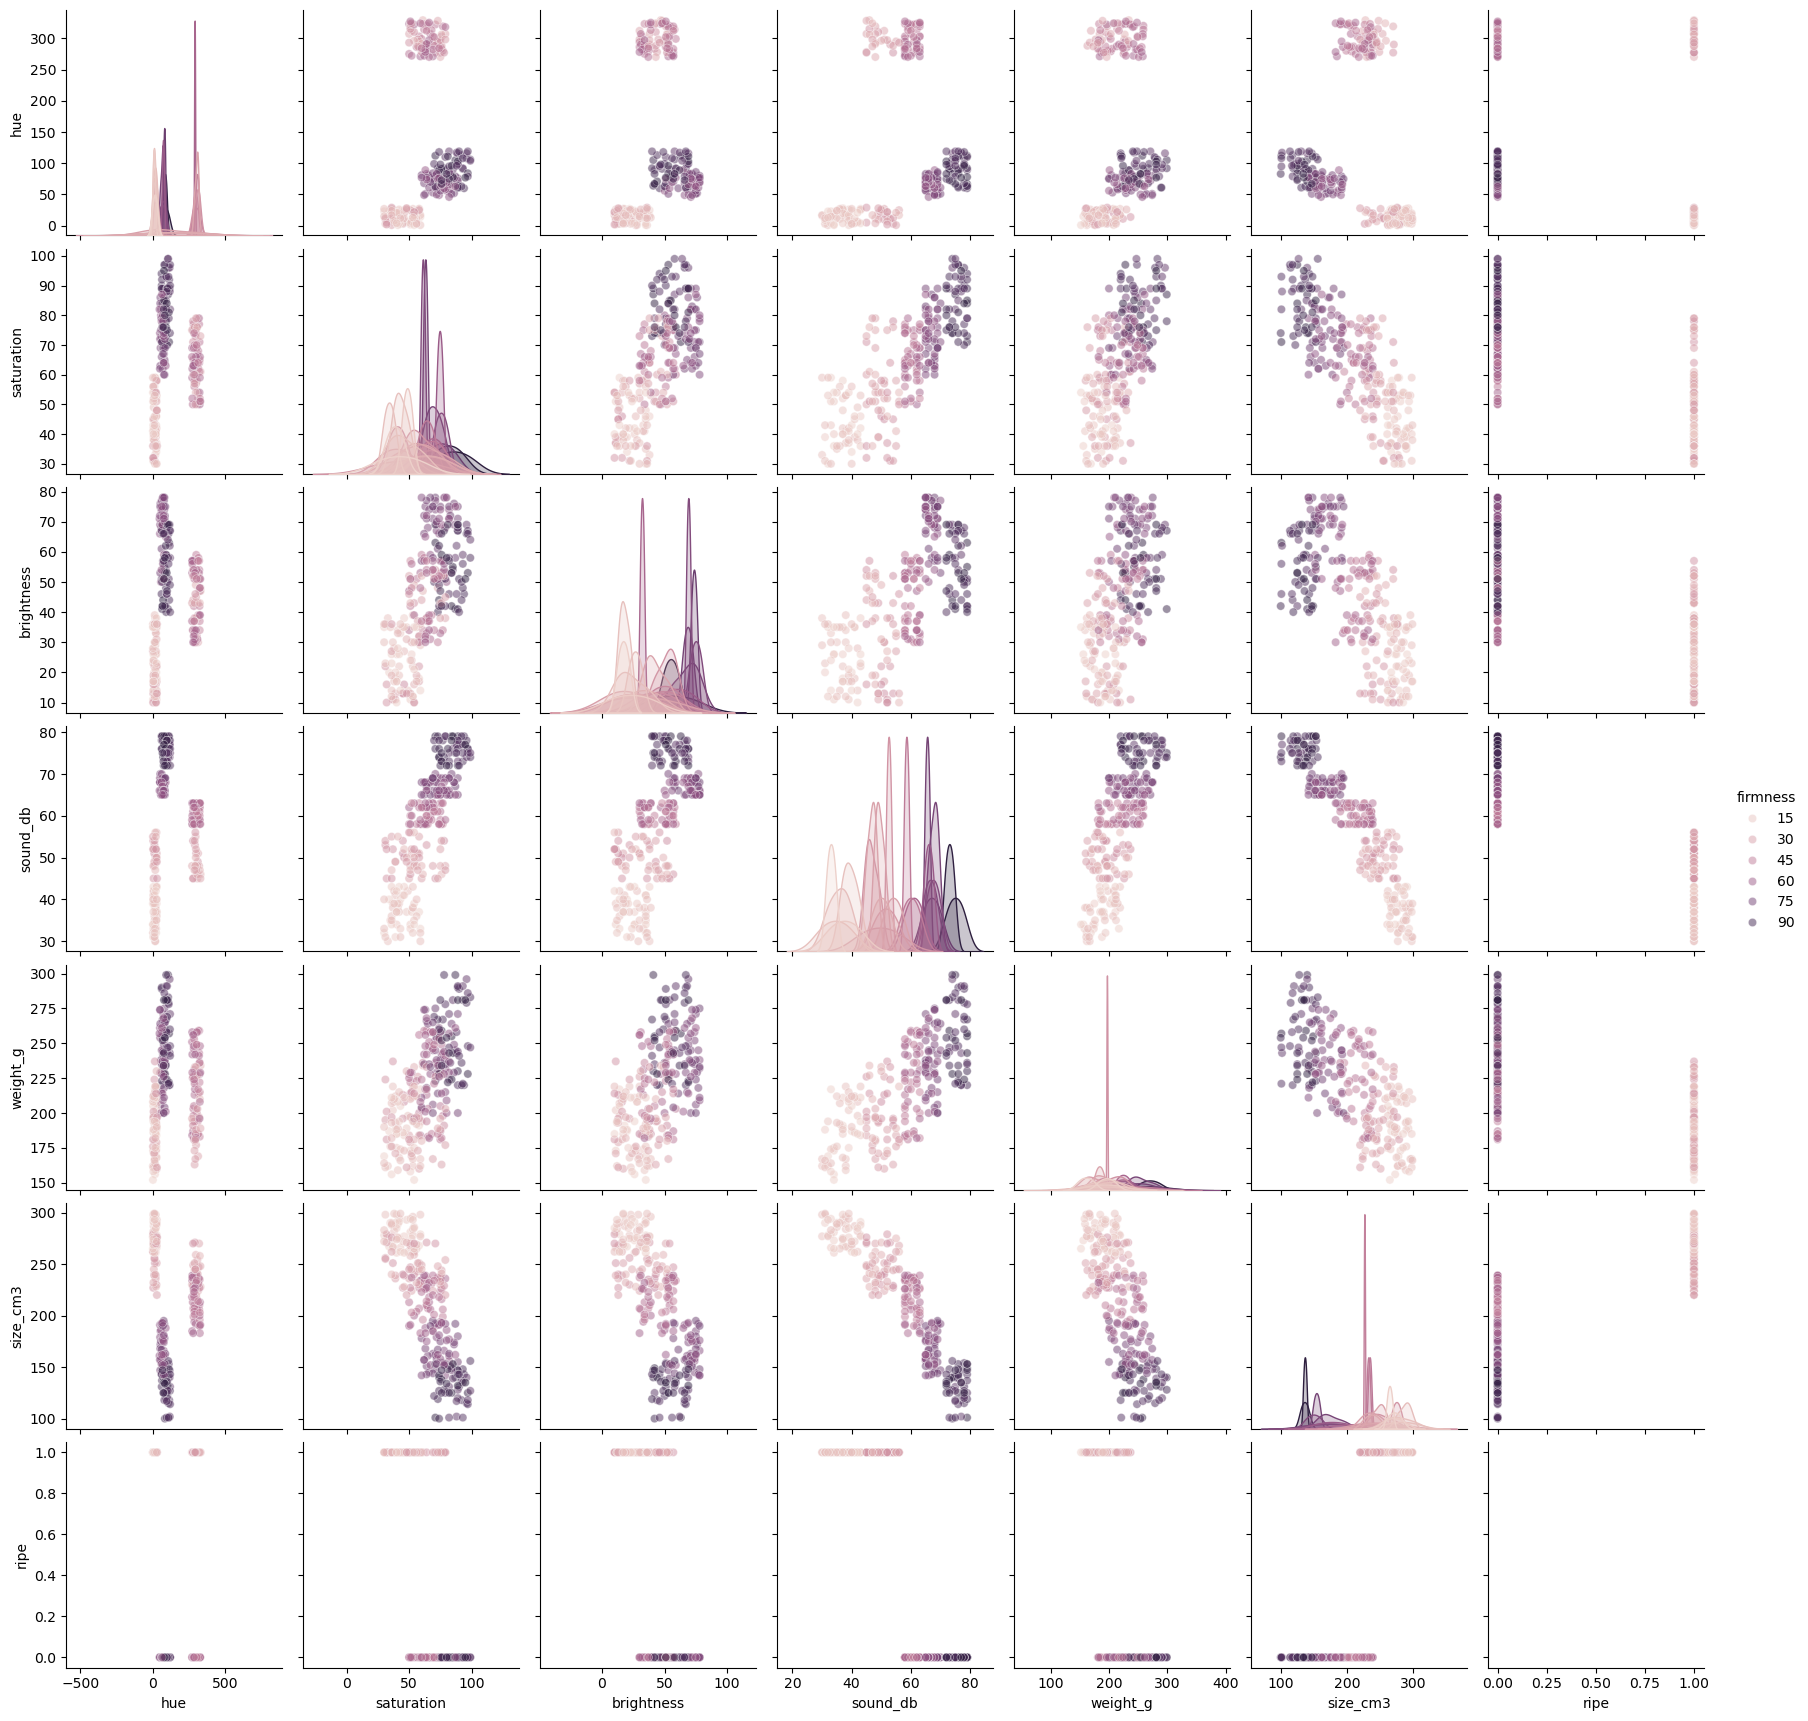

In [33]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.5}, hue='firmness')
plt.show()

To identify good individual features for predicting firmness, we will look for variables whose distributions have clusters of categories with little to no overlap. This could potentially be acoustic response ('sound_db') or size ('size_cm3').

To identify good sets of multiple features for predicting firmness, we will look for pairs of features that appear to have relationships stratified by firmness. This could potentially be any pair of features in the dataset, especially those containing acoustic response. We should be somewhat wary of pairs containing 'hue' because the observations appear to be less clustered compared to other pairs.

Therefore, firmness seems to have some distinct clusters based on features in the dataset. So, we will build a model to predict firmness based on acoustic response ('sound_db') and size ('size_cm3').

### Pairplot for Ripeness

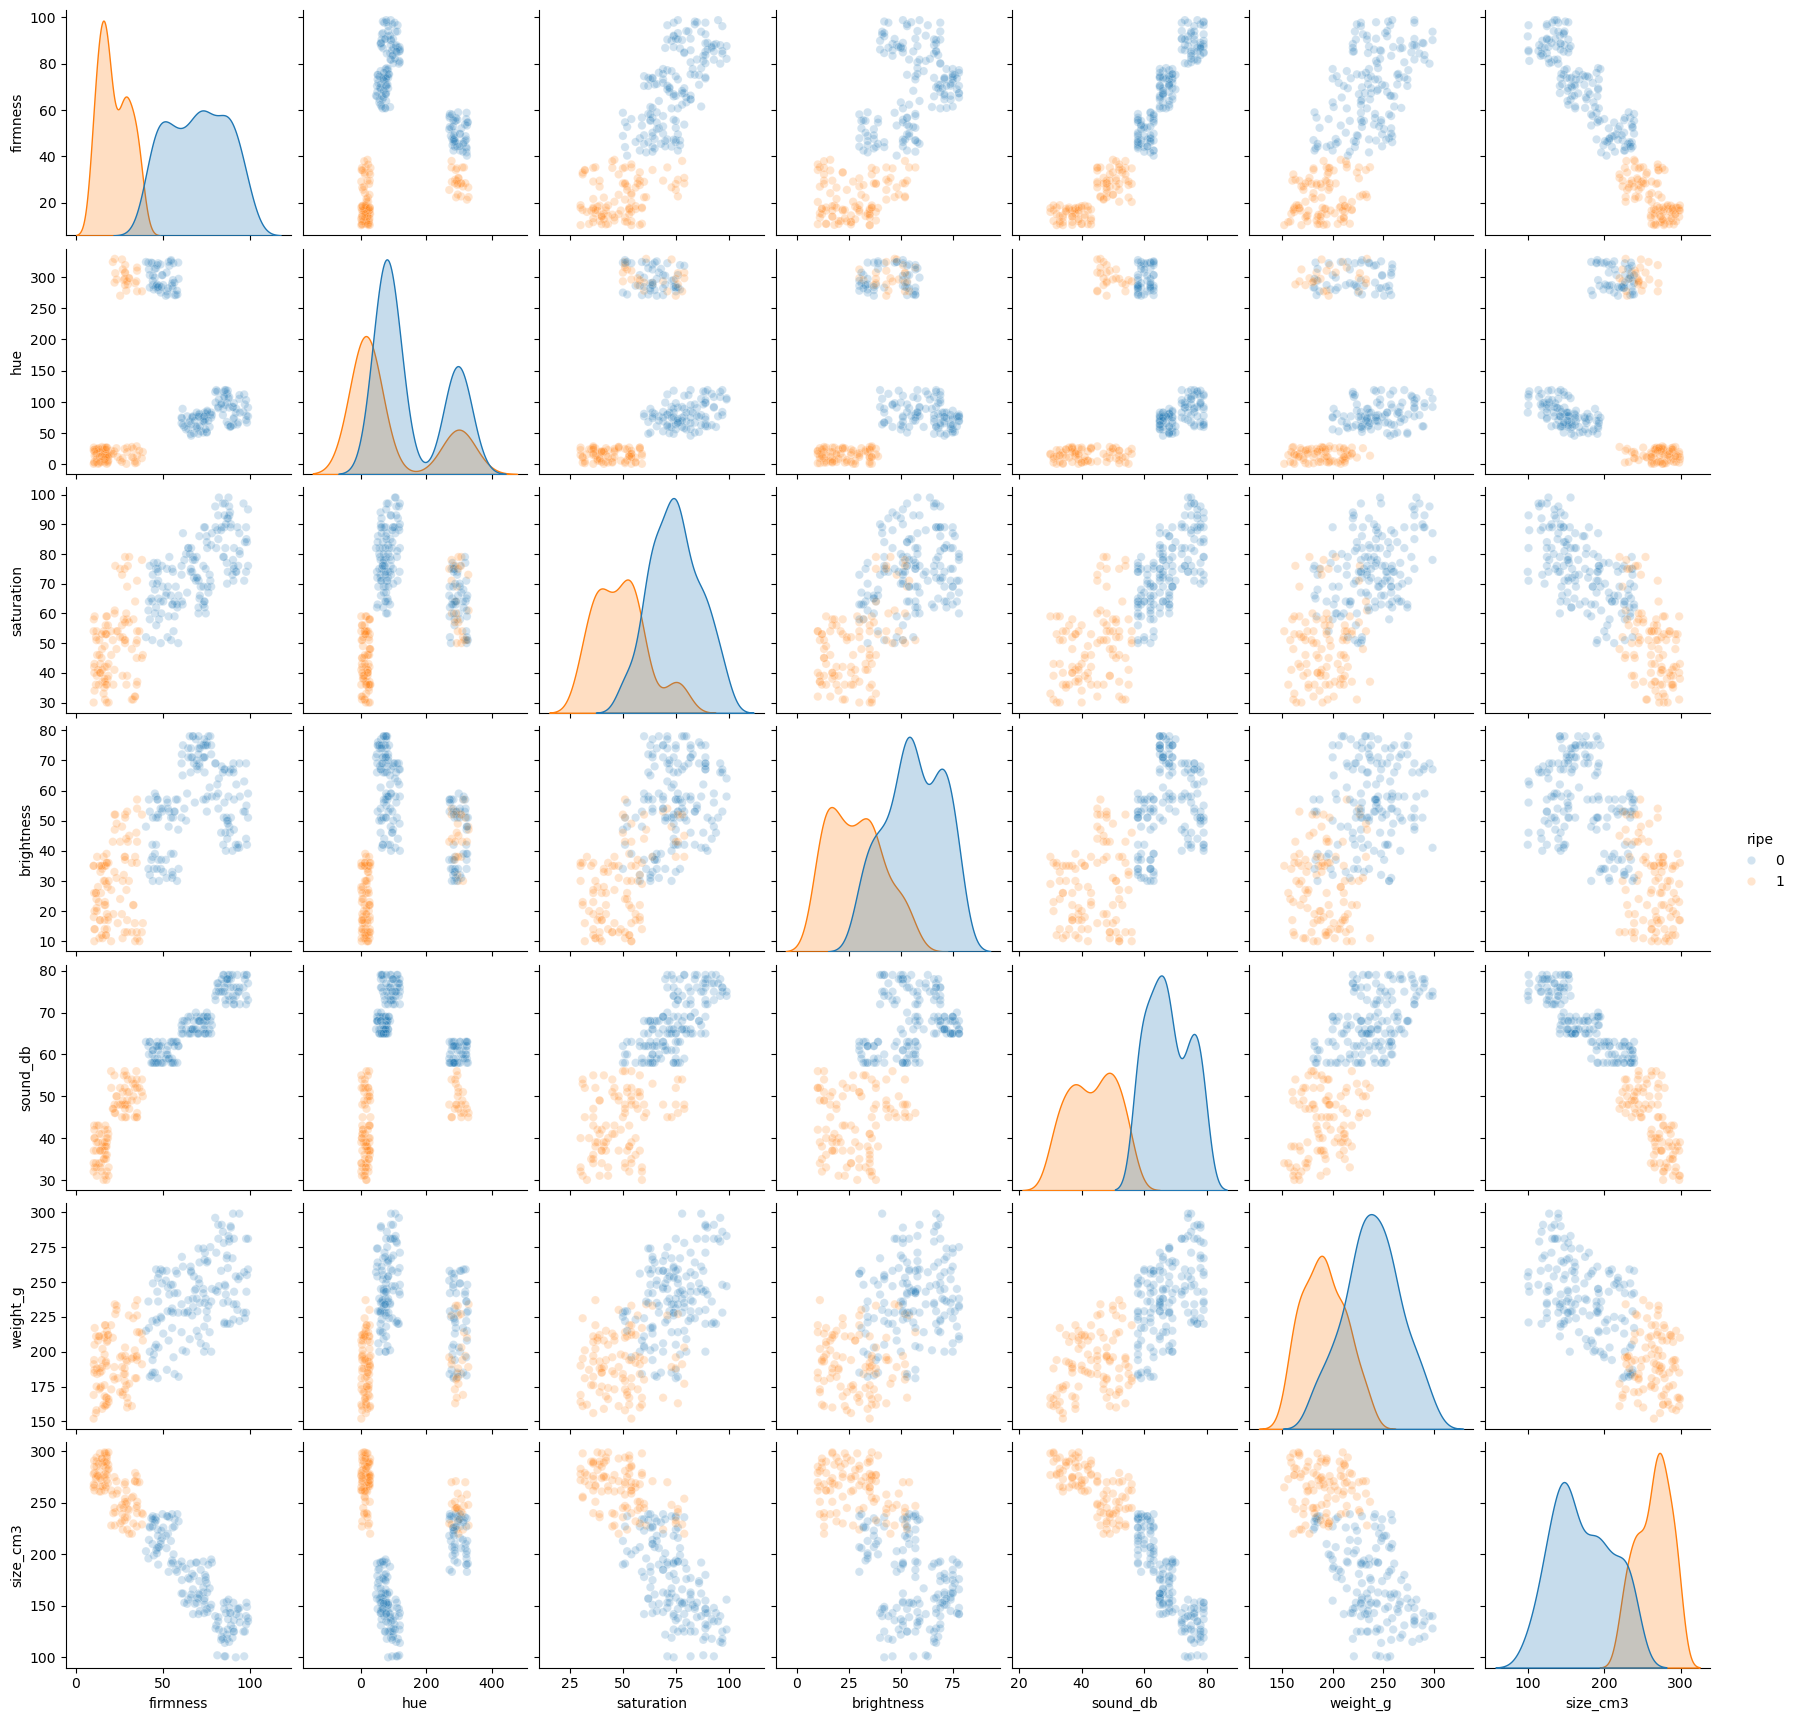

In [34]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2}, hue='ripe')
plt.show()

To identify good individual predictors for classification of ripe or not, we will look for variables whose distributions have clusters of categories with little to no overlap. This could potentially be 'firmness' or acoustic response ('sound_db').

In general, the distributions for two feature combinations tend to be stratified by ripeness category. This could potentially be most of the features in the dataset because most have distinct clusters. We should be wary of 'weight_g' and 'hue' because they have less distinct clustering and more overlap.

Therefore, ripeness seems to have some distinct clusters based on features in the dataset. So, we will build a model to predict ripeness based on 'firmness' and acoustic response ('sound_db').

## Numerical Features

To build a model to predict firmness based on acoustic response ('sound_db') and size ('size_cm3'), we must first decide what type of model we will build. Since firmness is a continuous numerical feature, we will use a linear regression. From the pairplot of firmness, the relationship between acoustic response and size appears to be somewhat linear. So, we will build a linear regression with a linear model.

### Test Train Split

In [38]:
x_cols = ['sound_db','size_cm3']
y_cols = ['firmness']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

### Build the Linear Regression Linear Model

In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train.to_numpy().reshape(-1))

LinearRegression()

In [69]:
# Predict and evaluate
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"RMSE on test set: {rmse:.3f}")
print(f"R² on test set: {r2:.3f}")

# We cannot plot the results because there are two independent variables (x values / features)

MSE on test set: 45.563
RMSE on test set: 6.750
R² on test set: 0.931


In [75]:
print("STD: " + str(df['firmness'].std()))

STD: 27.277677838721754


The root mean squared error is relatively low, especially compared to the standard deviation of the 'firmness' feature. Additionally, the $R^2$ value is close to 1, which means most of the variance in the test data is explained by the model. So, we have created a linear regression model that predicts avocado firmness based on acoustic response and size with relatively high prediction ability.

In [70]:
df['firmness'].describe()

count    250.000000
mean      50.618400
std       27.277678
min       10.300000
25%       25.750000
50%       48.950000
75%       74.050000
max       98.800000
Name: firmness, dtype: float64

## Other Features

- Can you predict whether or not an avocado is ripe based on one or more of the other features?
**NOTE - below I add a column for ripe 0/1** use this as your target.

     - What model should you use here and why? (eg. Linear Regression vs Logistic Regression, Linear model vs. Nonlinear model)
    - Use appropriate numerical measures to talk about how good your model is (eg. for Linear Regression we would talk about MSE and $R^2$ but for Logistic Regression we might do a classification report)

To build a model to predict whether an avocado is ripe based on firmness and acoustic response ('sound_db'), we must first decide what type of model we will build. Since 'ripe' is a categorical feature (true/1 or false/0), we will use a logistic regression. From the pairplot of ripeness, the relationship between acoustic response and size appears to be somewhat linear and a linear decision boundary seems to be able to cut the distribution into clusters by whether the avocado is ripe or not. So, we will build a logistic regression with a linear model.

### Test Train Split

In [76]:
x_cols = ['firmness','sound_db']
y_cols = ['ripe']

X = df[x_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train.to_numpy().reshape(-1))

LogisticRegression()

In [78]:
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 1.000
Confusion Matrix:
[[29  0]
 [ 0 21]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



The accuracy for the logistic regression is 1, which means the model correctly predicted 29 unripe avocados and 21 ripe avocados, also seen by the confusion matrix. The precision, recall, and f1-score are all 1, which means the accuracy of positive predictions (few false positives), finding all actual positives (few false negatives), and harmonic mean of the previous two probabilities are all high. So, we have created a logistic regression model that predicts whether an avocado is ripe or not based on firmness and acoustic response with very high predictive ability.